In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Analysis of Top Production Countries by Average IMDB Score**

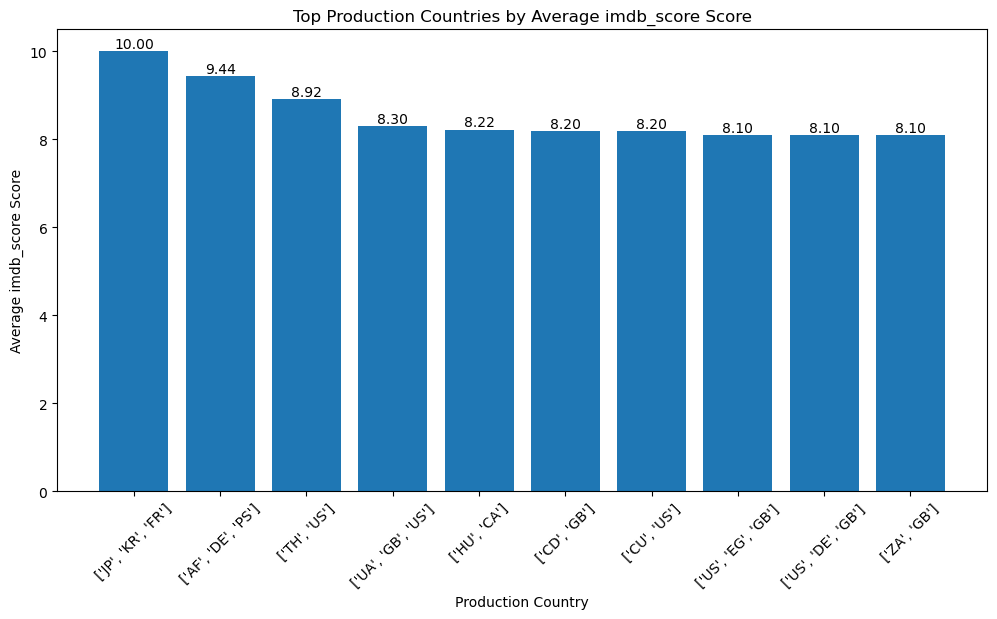

In [22]:
data = pd.read_csv('titles_mod2.csv')

# Define the feature of interest (imdb_score) and the group-by column (production_countries)
feature_of_interest = 'imdb_score'
group_by_column = 'production_countries'

# Calculate the average IMDB_score for each production country
average_scores_by_country = data.groupby(group_by_column)[feature_of_interest].mean().reset_index()

# Sort the countries based on the average imdb_score in descending order
sorted_countries = average_scores_by_country.sort_values(by=feature_of_interest, ascending=False)

# Reset the index for the sorted DataFrame
sorted_countries.reset_index(drop=True, inplace=True)

# Plot the top countries in a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_countries[group_by_column][:10], sorted_countries[feature_of_interest][:10])
plt.xlabel('Production Country')
plt.ylabel(f'Average {feature_of_interest} Score')
plt.title(f'Top Production Countries by Average {feature_of_interest} Score')
plt.xticks(rotation=45)

# Add IMDB_score labels to the bars
for i, score in enumerate(sorted_countries[feature_of_interest][:10]):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()

### **Calculate the movie count**

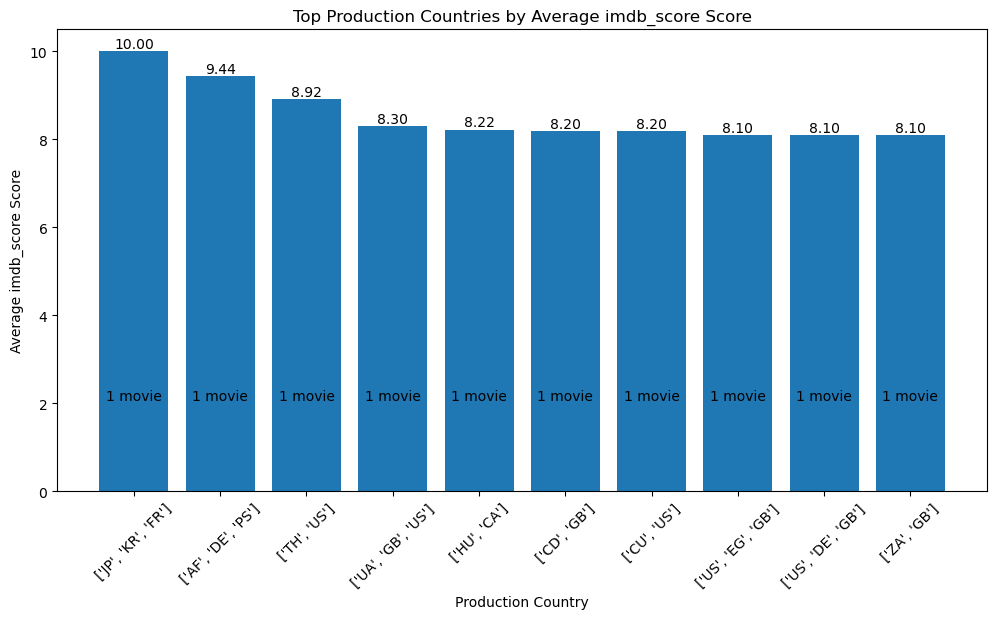

In [23]:
# Calculate the count of movies for each production country
movie_count_by_country = data.groupby(group_by_column)['id'].count().reset_index()
movie_count_by_country.rename(columns={'id': 'Number of Movies'}, inplace=True)

# Merge the movie count with the average scores DataFrame
merged_data = pd.merge(average_scores_by_country, movie_count_by_country, on=group_by_column)

# Sort the countries based on the average IMDB_score in descending order
sorted_countries = merged_data.sort_values(by=feature_of_interest, ascending=False)

# Reset the index
sorted_countries.reset_index(drop=True, inplace=True)

# Plot the top countries in a bar chart along with the movie count
plt.figure(figsize=(12, 6))
plt.bar(sorted_countries[group_by_column][:10], sorted_countries[feature_of_interest][:10])
plt.xlabel('Production Country')
plt.ylabel(f'Average {feature_of_interest} Score')
plt.title(f'Top Production Countries by Average {feature_of_interest} Score')
plt.xticks(rotation=45)

# Add IMDB_score labels to the bars
for i, score in enumerate(sorted_countries[feature_of_interest][:10]):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
    
# Add movie count to the bars
for i, v in enumerate(sorted_countries['Number of Movies'][:10]):
    if v == 1:
        plt.text(i, v + 1, f'{v} movie', ha='center', va='bottom')
    else:
        plt.text(i, v + 1, f'{v} movies', ha='center', va='bottom')

plt.savefig("Figures/list_of_countries.png")
plt.show()


### **Analysis in terms of an individual country, not a lists of countries**

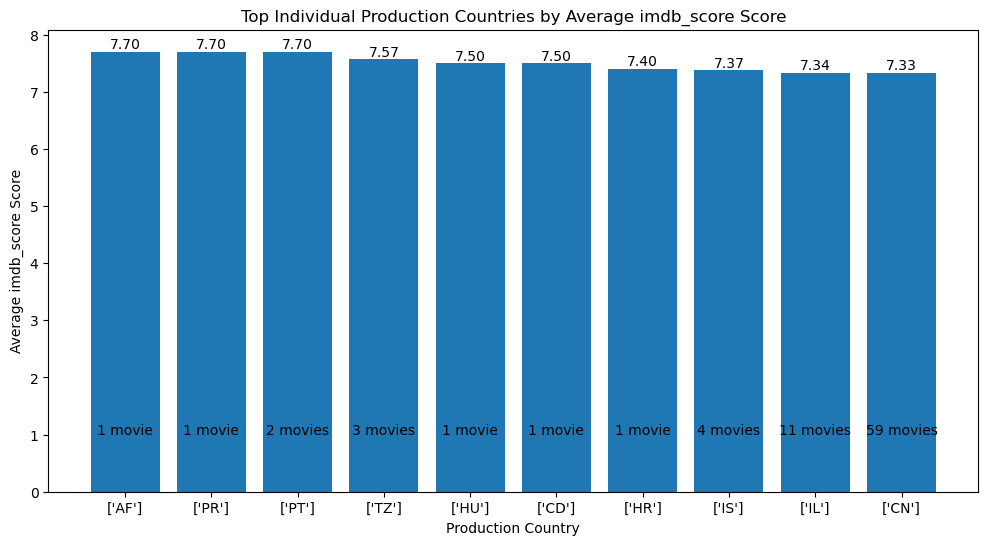

In [24]:
# Calculate the average IMDb score for each production country
average_scores_by_country = data.groupby(group_by_column)[feature_of_interest].mean().reset_index()

# Calculate the count of movies produced per country
count_movies_by_country = data[group_by_column].str.split(', ').explode().value_counts().reset_index()
count_movies_by_country.columns = [group_by_column, 'Movie Count']

# Merge the average scores and movie count DataFrames
merged_data = pd.merge(average_scores_by_country, count_movies_by_country, on=group_by_column)

# Sort the countries based on the average IMDb score in descending order
sorted_countries = merged_data.sort_values(by=feature_of_interest, ascending=False)

# Reset the index
sorted_countries.reset_index(drop=True, inplace=True)

# Plot the top countries in a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_countries[group_by_column][:10], sorted_countries[feature_of_interest][:10])
plt.xlabel('Production Country')
plt.ylabel(f'Average {feature_of_interest} Score')
plt.title(f'Top Individual Production Countries by Average {feature_of_interest} Score')

# Add labels for the number of movies produced in each country 
for i, score in enumerate(sorted_countries[feature_of_interest][:10]):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

for i, (country, score) in enumerate(zip(sorted_countries[group_by_column][:10], sorted_countries[feature_of_interest][:10])):
    movie_count = sorted_countries['Movie Count'][i]
    if movie_count == 1:
        plt.text(i, 1, f'{movie_count} movie', ha='center')
    else:
        plt.text(i, 1, f'{movie_count} movies', ha='center')

plt.savefig("Figures/individual_countries.png")
plt.show()

### **Box plot of individual countries producing over 5 movies**

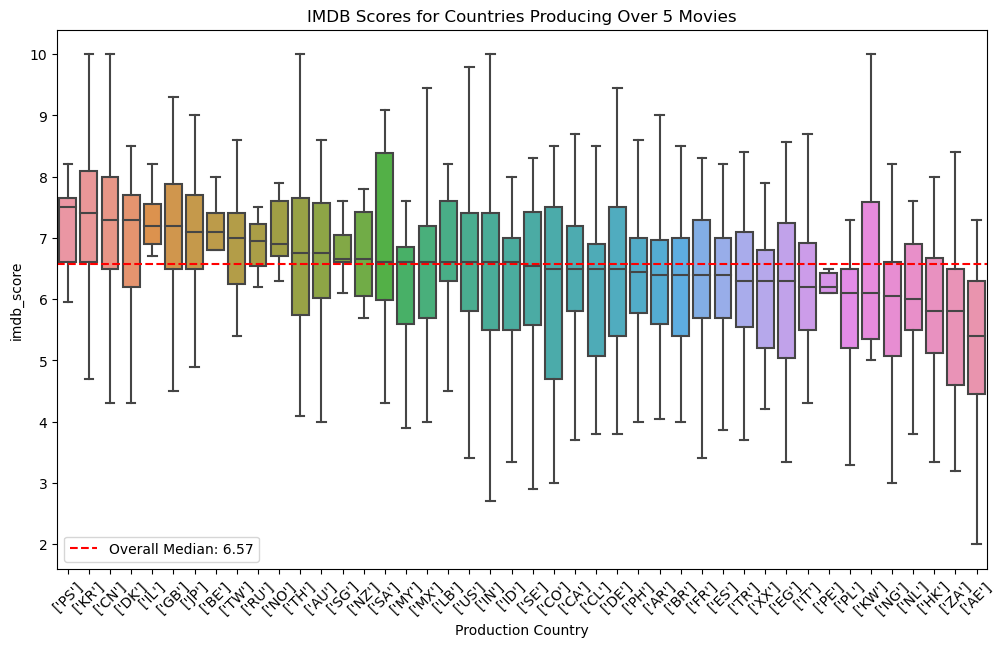

In [25]:
# Filter out rows where the group_by_column is an empty list
data = data[data[group_by_column].apply(lambda x: isinstance(x, str) and len(eval(x)) > 0)]

# Calculate the median IMDb score for each production country
median_scores_by_country = data.groupby(group_by_column)[feature_of_interest].median().reset_index()

# Calculate the count of movies produced per country
count_movies_by_country = data[group_by_column].str.split(', ').explode().value_counts().reset_index()
count_movies_by_country.columns = [group_by_column, 'Movie Count']

# Merge the median scores and movie count DataFrames
merged_data = pd.merge(median_scores_by_country, count_movies_by_country, on=group_by_column)

# Filter countries that produce over 5 movies
filtered_data = merged_data[merged_data['Movie Count'] > 5]

# Sort the countries based on the median IMDb score in descending order
filtered_data = filtered_data.sort_values(by=feature_of_interest, ascending=False)

# Calculate the overall median IMDb score for selected countries
overall_median = filtered_data[feature_of_interest].median()

# Use the sorted country order to filter the data for the box plot
sorted_countries = filtered_data[group_by_column].tolist()
data_to_plot = data[data[group_by_column].isin(sorted_countries)]

# Create a box plot using Seaborn
# reference from https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(12, 7))
sns.boxplot(x=group_by_column, y=feature_of_interest, data=data_to_plot, order=sorted_countries, showfliers=False)

# Add a horizontal line for the overall IMDb median
plt.axhline(y=overall_median, color='r', linestyle='--', label=f'Overall Median: {overall_median:.2f}')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Production Country')
plt.ylabel(f'{feature_of_interest}')
plt.title(f'IMDB Scores for Countries Producing Over 5 Movies')
plt.legend()

plt.savefig("Figures/countries_box_plot.png")
plt.show()